In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay

In [4]:
bank = pd.read_csv("bank.csv")

In [5]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,0
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,0
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,0
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,0
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,0


In [6]:
bank.shape

(4521, 17)

In [7]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   int64 
dtypes: int64(8), object(9)
memory usage: 600.6+ KB


In [8]:
bank.describe()

,age,balance,day,duration,campaign,pdays,previous,y
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579,0.115240
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562,0.319347
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000,1.000000


In [9]:
bank.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [10]:
bank.duplicated().sum()

0

In [11]:
bank[bank.duplicated()]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


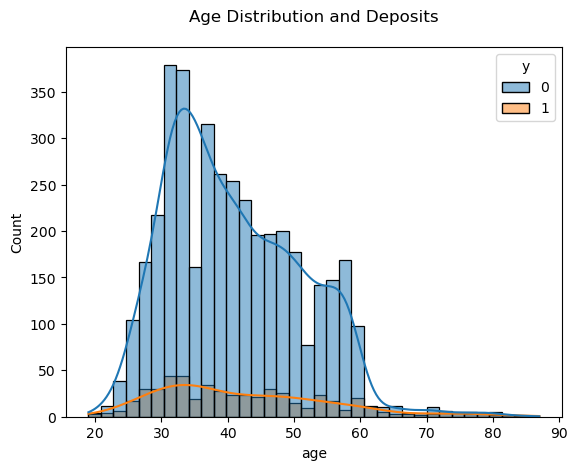

In [12]:
sns.histplot(x="age", data=bank, kde=True, hue= "y")
plt.title("Age Distribution and Deposits\n")
plt.show()

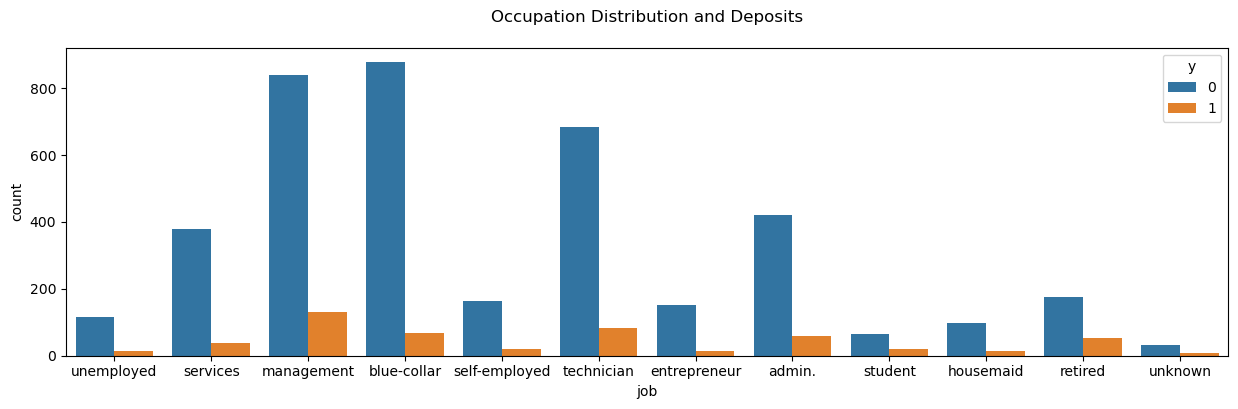

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
bank['job'] = bank['job'].astype(str)
bank['y'] = bank['y'].astype(str)
plt.figure(figsize=(15,4))
sns.countplot(x="job", data= bank, hue ="y")
plt.title("Occupation Distribution and Deposits\n")
plt.show()

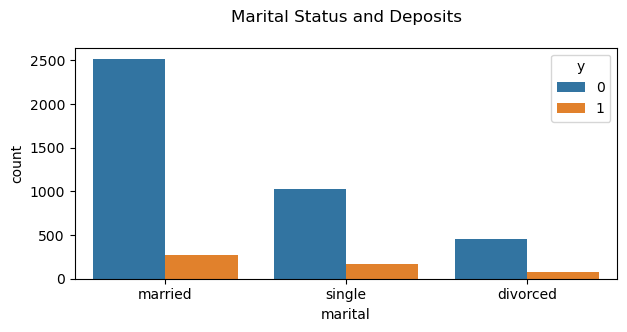

In [17]:
plt.figure(figsize=(7,3))
sns.countplot(x="marital", data= bank, hue ="y")
plt.title("Marital Status and Deposits\n")
plt.show()

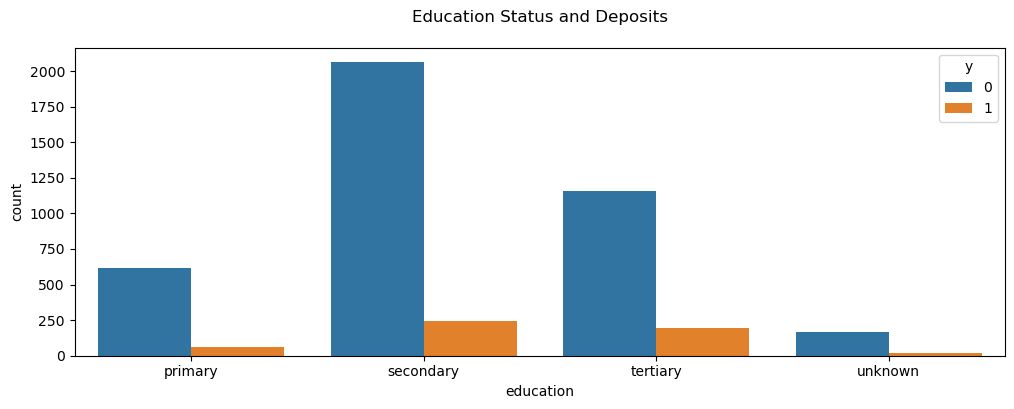

In [18]:
plt.figure(figsize=(12,4))
sns.countplot(x="education", data= bank, hue ="y")
plt.title("Education Status and Deposits\n")
plt.show()

In [19]:
bank.default.value_counts()

default
no     4445
yes      76
Name: count, dtype: int64

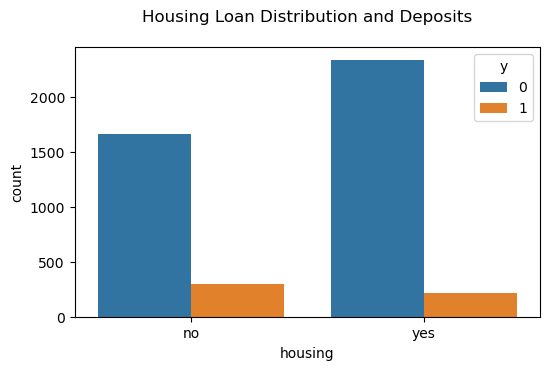

In [20]:
plt.figure(figsize=(6,3.5))
sns.countplot(x="housing", data= bank, hue ="y")
plt.title("Housing Loan Distribution and Deposits\n")
plt.show()

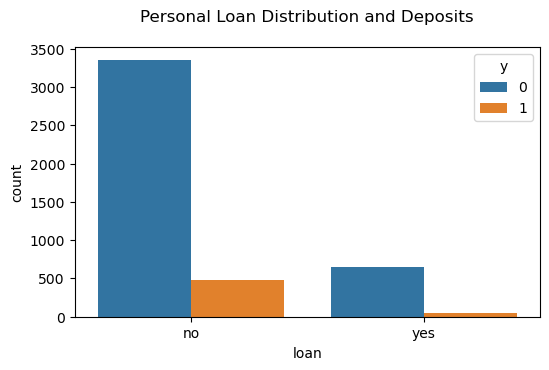

In [21]:
plt.figure(figsize=(6,3.5))
sns.countplot(x="loan", data= bank, hue ="y")
plt.title("Personal Loan Distribution and Deposits\n")
plt.show()

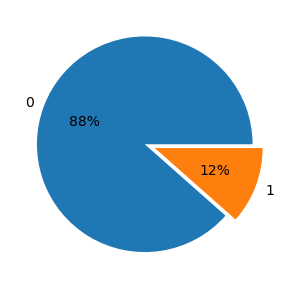

In [22]:
bank.y.value_counts()
keys = bank.y.value_counts().index
data = bank.y.value_counts().values
plt.figure(figsize=(6,3.5))
explode = [0,0.1]
plt.pie(data,labels=keys,explode=explode, autopct='%.0f%%')
plt.show()

In [23]:
cols = bank.select_dtypes("object").columns
cols

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'y'],
      dtype='object')

In [24]:
le = LabelEncoder()

bank[cols] = bank[cols].apply(le.fit_transform)

In [26]:
bank.head(3)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,10,1,0,0,1787,0,0,0,19,10,79,1,-1,0,3,0
1,33,7,1,1,0,4789,1,1,0,11,8,220,1,339,4,0,0
2,35,4,2,2,0,1350,1,0,0,16,0,185,1,330,1,0,0


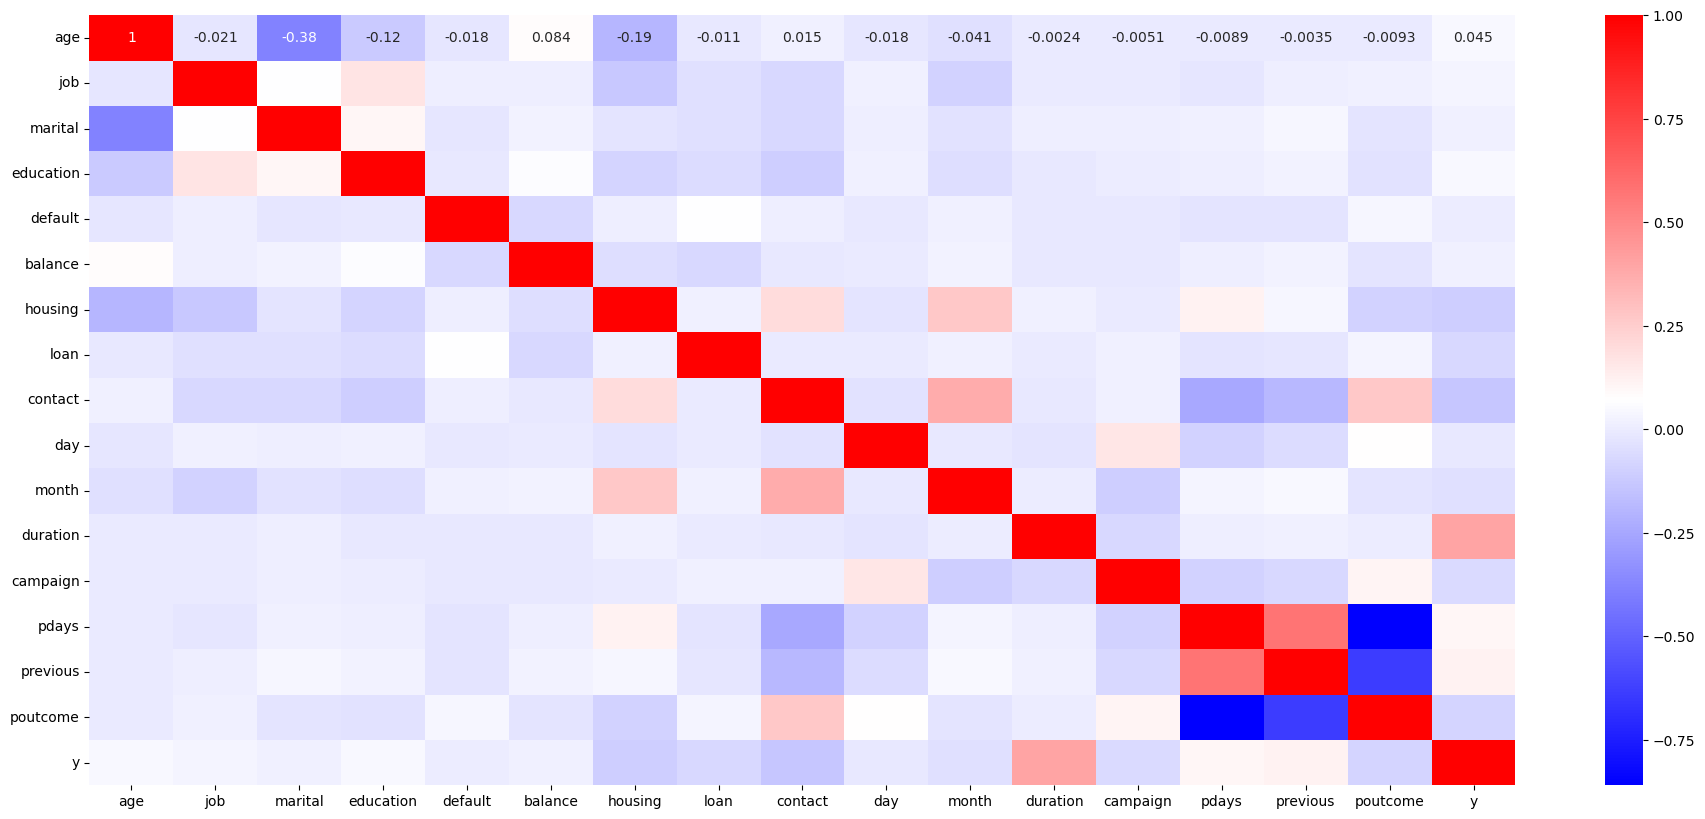

In [27]:
plt.figure(figsize=(23,10))
sns.heatmap(bank.corr(), cmap='bwr', annot=True)
plt.show()

In [28]:
X = bank.drop("y", axis=1)
y = bank.y

In [29]:
scaler = StandardScaler()

X_scaled = pd.DataFrame(scaler.fit_transform(X), columns = X.columns)

In [30]:
train_X, test_X, train_y, test_y = train_test_split(X_scaled, y, test_size=0.3)

In [31]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(train_X, train_y)

DecisionTreeClassifier()

In [32]:
print('Train Score: {}'.format(decision_tree.score(train_X, train_y)))  
print('Test Score: {}'.format(decision_tree.score(test_X, test_y)))  

Train Score: 1.0
Test Score: 0.8599852616064849


In [33]:
cross_val_score(decision_tree, train_X, train_y, cv=5).mean()

0.8568305437238786

In [34]:
ypred = decision_tree.predict(test_X)
print(classification_report(test_y,ypred))

              precision    recall  f1-score   support

           0       0.93      0.91      0.92      1207
           1       0.38      0.43      0.40       150

    accuracy                           0.86      1357
   macro avg       0.65      0.67      0.66      1357
weighted avg       0.87      0.86      0.86      1357



In [35]:
param_grid = {
    'max_depth': [3, 5, 7,10, None],
    'criterion' : ['gini', 'entropy'],
    'min_samples_leaf': [3, 5, 7, 9,10,20]
    }

In [36]:
gscv = GridSearchCV(decision_tree, param_grid, cv=5, verbose=1)
gscv.fit(train_X, train_y)


Fitting 5 folds for each of 60 candidates, totalling 300 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10, None],
                         'min_samples_leaf': [3, 5, 7, 9, 10, 20]},
             verbose=1)

In [37]:
gscv.best_params_

{'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 5}

In [38]:
gscv.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=5)

In [39]:
cross_val_score(gscv.best_estimator_, train_X, train_y, cv=5).mean() 

0.9013898054272401

In [40]:
clf = DecisionTreeClassifier(criterion= 'gini', max_depth= 5, min_samples_leaf = 3)
clf.fit(train_X, train_y)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=3)

In [41]:
print('Train Score: {}'.format(clf.score(train_X, train_y)))
print('Test Score: {}'.format(clf.score(test_X, test_y)))

Train Score: 0.9152970922882427
Test Score: 0.899042004421518


In [42]:
pred_y = clf.predict(test_X)

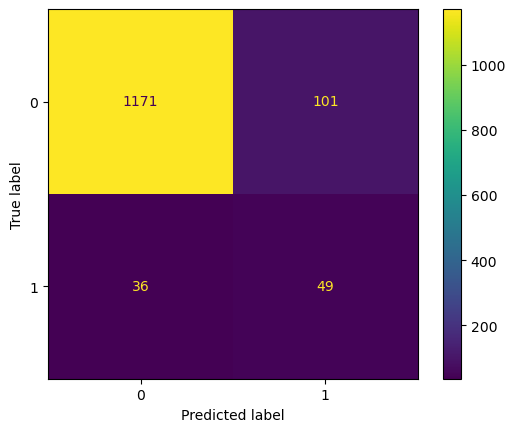

In [43]:
cm = confusion_matrix(pred_y, test_y)
ConfusionMatrixDisplay(cm, display_labels=clf.classes_).plot()
plt.show()

In [44]:
print(classification_report(pred_y, test_y))

              precision    recall  f1-score   support

           0       0.97      0.92      0.94      1272
           1       0.33      0.58      0.42        85

    accuracy                           0.90      1357
   macro avg       0.65      0.75      0.68      1357
weighted avg       0.93      0.90      0.91      1357



In [45]:
accuracy = accuracy_score(test_y,pred_y)
print("Test Accuracy of Decision Tree Classifier : {}".format(accuracy*100))

Test Accuracy of Decision Tree Classifier : 89.9042004421518


In [46]:
Cross_val = cross_val_score(clf, test_X,test_y, cv=5).mean()     
print("Cross-Validation Accuracy Scores Decision Tree : ",Cross_val*100)

Cross-Validation Accuracy Scores Decision Tree :  88.8739960929021


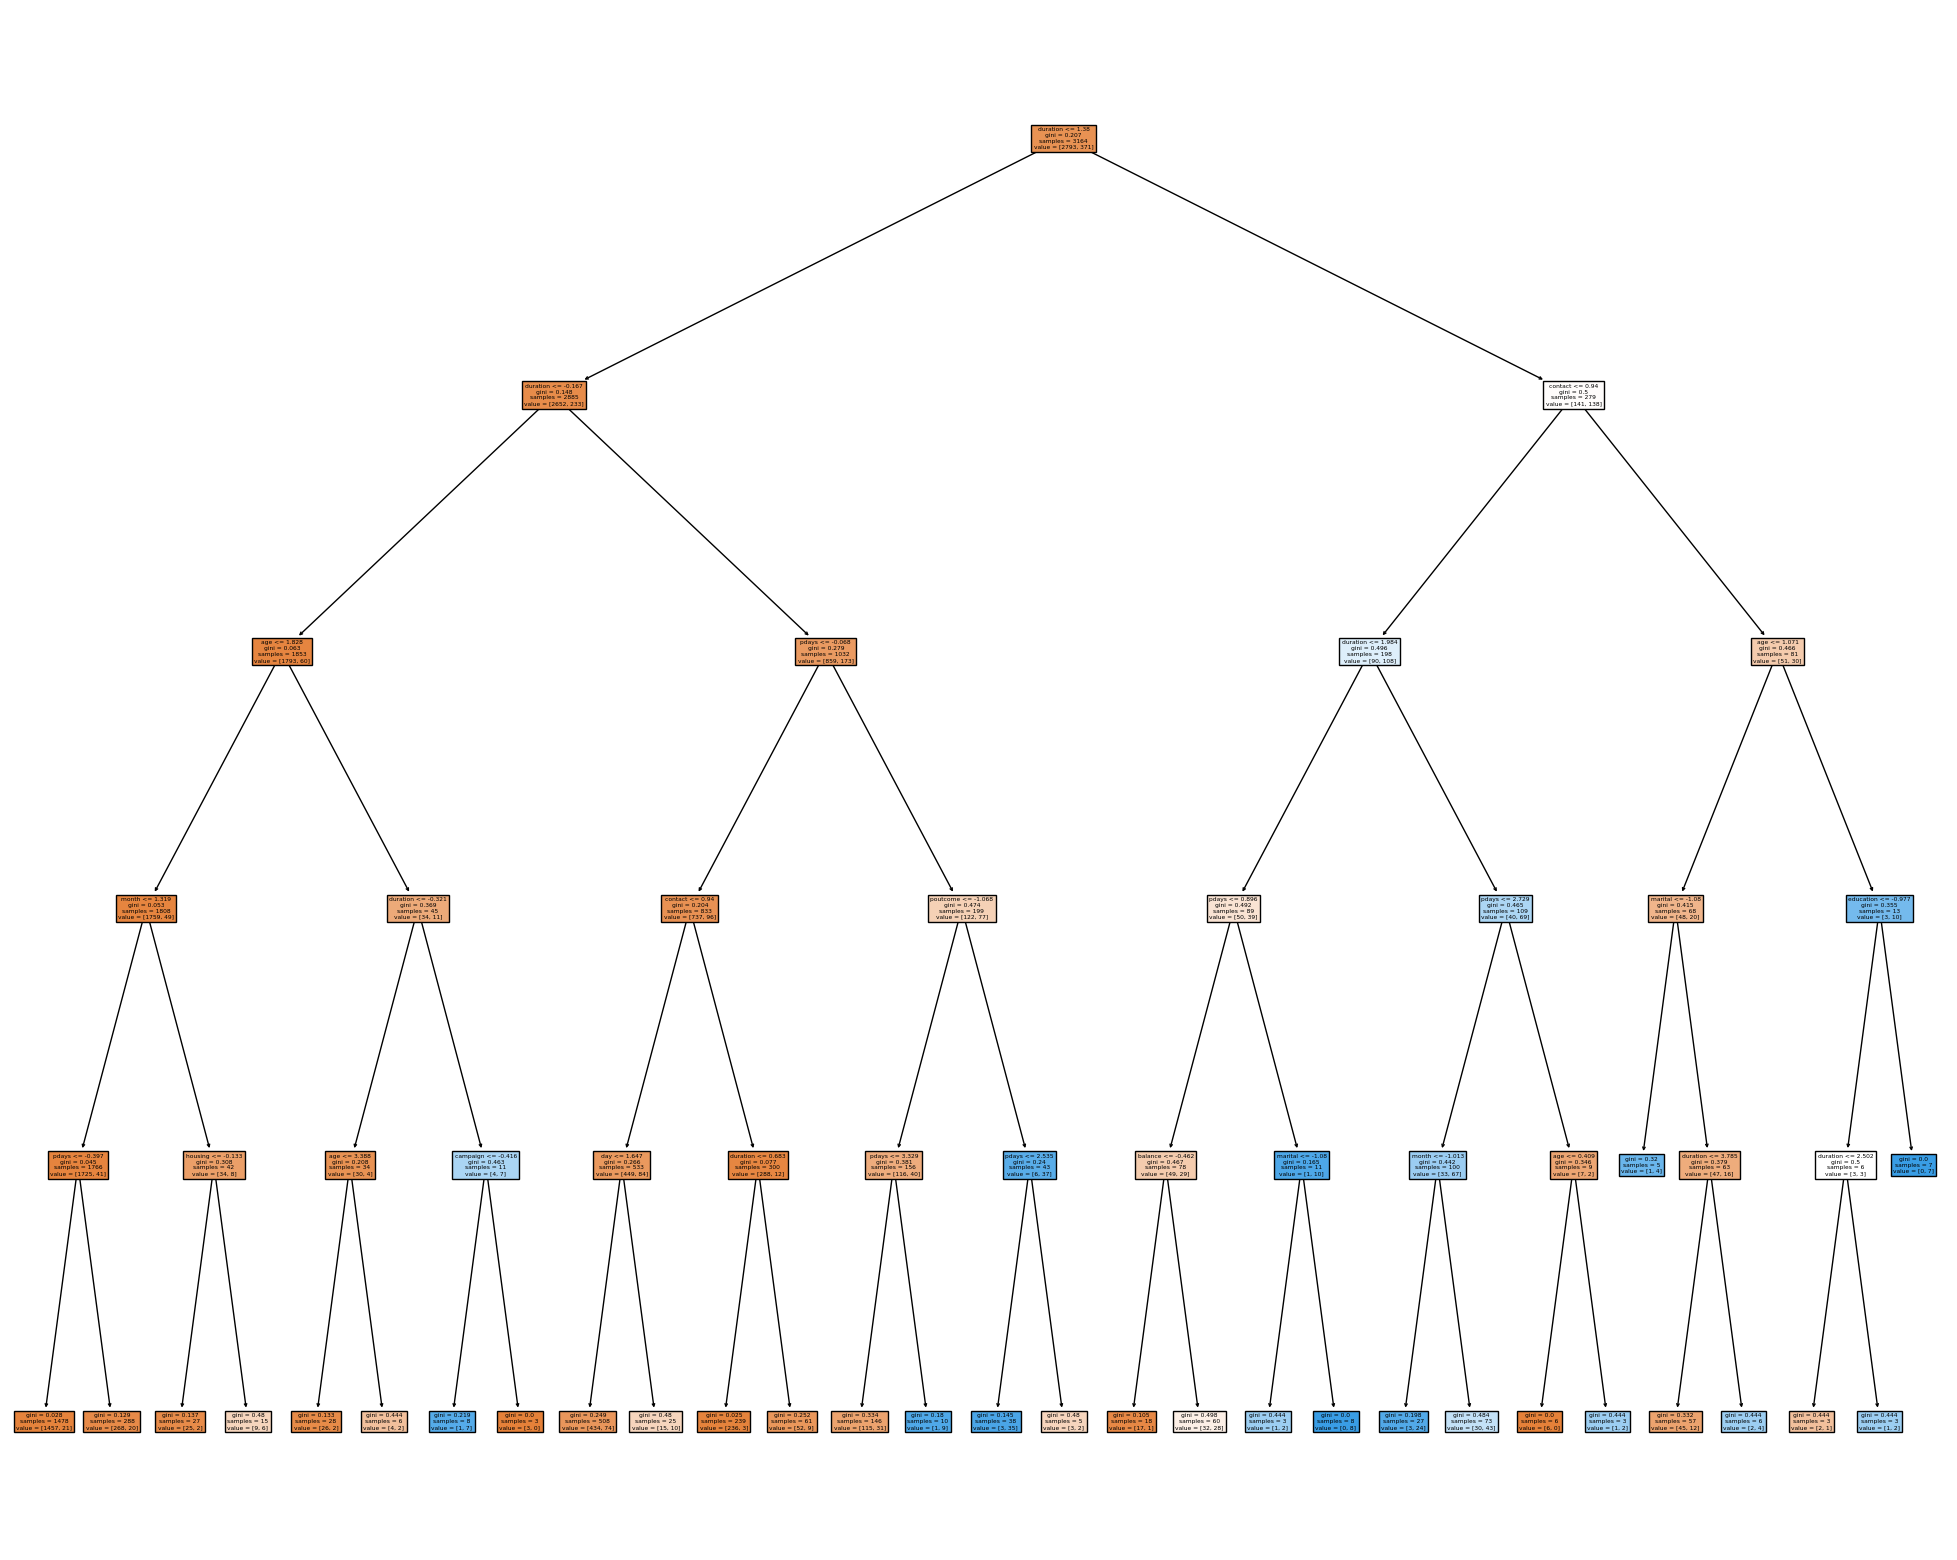

In [47]:
from sklearn import tree
fig = plt.figure(figsize=(25,20))
t= tree.plot_tree(clf,filled=True,feature_names=X.columns)